In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import pandas as pd
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from fastai.imports import *
from fastai.structured import *
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import roc_curve, auc,accuracy_score
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.ensemble import IsolationForest,ExtraTreesClassifier
# from imblearn.over_sampling import ADASY
from mlxtend.classifier import StackingClassifier,StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

THis Competition was very good as it was really hard to not overfit the data and all columns were anonymised so we use Extratress
classifier to get a naive idea to get top250 features and the apply RFE to get final 125 columns and we store that in a PICKLE Format

In [2]:
df = pd.read_csv("D:/Kaggle/HDFC-ML Hiring Hackerearth/DataSet/Train.csv",low_memory=False)
df_test = pd.read_csv("D:/Kaggle/HDFC-ML Hiring Hackerearth/DataSet/Test.csv",low_memory=False)

In [3]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [4]:
import pickle
file = open('columns.pickle','rb')
labels_rfe = pickle.load(file)
file.close()

In [5]:
y_train = df['Col2']
df.drop('Col2',axis=1,inplace=True)
y_test_cols = df_test['Col1']

In [6]:
df_combined = df.append(df_test)
df_combined.fillna(df_combined.mean(),inplace=True)
df_combined, y_temp, nas = proc_df(df_combined,'Col1')

In [150]:
X_train = df_combined[0:17521]
df_test = df_combined[17521:37963]

In [151]:
X_train = X_train[labels_rfe]
X_test =df_test[labels_rfe]

In [15]:
df.fillna(df.mean(),inplace=True)

In [16]:
df,temp,nas = proc_df(df,'Col1')

In [17]:
X_train1, X_valid, y_train1, y_valid = train_test_split(df, df['Col2'], test_size=0.1, random_state=42)

In [18]:
X_train1 = X_train1[labels_rfe]
X_valid = X_valid[labels_rfe]

In [116]:
m = ExtraTreesClassifier(random_state=22,class_weight='balanced')
m.fit(X_train1[k],y_train1)
y_preds = m.predict(X_valid[k])
print(f1_score(y_valid,y_preds,average='weighted'))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8473393443773126


Using RF feature imporantance to remove these features that are not useful to us , which is a big mistake as i overfit the data due 
to this

In [66]:
X_test.drop(['Col2361','Col494','Col380','Col70','Col142','Col507','Col361','Col507','Col361','Col419','Col1897','Col1713','Col218','Col158','Col2269'],axis=1,inplace=True)
X_train.drop(['Col494','Col2361','Col380','Col70','Col142','Col507','Col361','Col507','Col361','Col419','Col1897','Col1713','Col218','Col158','Col2269'],axis=1,inplace=True)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000064987AB5C0>>
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [115]:
k = X_train.columns

In [96]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Col124,17521.0,2.106101,1.630330e+00,0.000000,1.000000,2.000000,3.000000,7.000000e+00
Col2048,17521.0,1.290509,1.239875e+00,0.000000,0.000000,1.000000,2.000000,5.000000e+00
Col889,17521.0,15.347817,9.352534e+01,0.000000,1.000000,7.000000,14.511003,1.175900e+04
Col240,17521.0,0.009061,2.817262e-02,0.000000,0.000333,0.002460,0.008991,1.289720e+00
Col10,17521.0,29710.686117,2.981508e+05,0.000000,1787.456213,5536.146833,17539.757690,2.788633e+07
Col437,17521.0,0.007097,2.097873e-02,0.000000,0.000268,0.001988,0.006978,6.857490e-01
Col574,17521.0,1.017956,4.845332e-01,0.000000,0.805241,1.013811,1.268787,2.449492e+00
Col907,17521.0,9.703896,6.318101e+01,0.000000,1.000000,6.000000,9.300121,8.060000e+03
Col621,17521.0,1.973524,1.202011e+01,0.000000,0.007500,0.055100,0.274700,1.000000e+02
Col872,17521.0,11.619894,1.125391e+01,0.000000,5.973684,9.800000,11.853526,1.870000e+02


In [105]:
m = XGBClassifier(n_estimators=150,learning_rate=0.05,gamma=0,
                  max_depth=5,min_child_weight=6,objective='binary:logistic',colsample_bytree=0.8,
                  scale_pos_weight=1,nthread=-1,subsample=0.8,reg_alpha=0.01)
m1 = StackingClassifier(classifiers=[m
],use_probas=True,average_probas=True,meta_classifier = m )

In [102]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr ,mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = m1.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score
def weighted_avg(index):
    y_predict = m1.predict(X_train.iloc[index])
    scores =  f1_score(y_train.iloc[index],y_predict,avera)
    return scores

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5254
           1       0.41      0.19      0.26       587

    accuracy                           0.89      5841
   macro avg       0.66      0.58      0.60      5841
weighted avg       0.86      0.89      0.87      5841

[[5088  166]
 [ 473  114]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5253
           1       0.42      0.17      0.24       587

    accuracy                           0.89      5840
   macro avg       0.67      0.57      0.59      5840
weighted avg       0.86      0.89      0.87      5840

[[5116  137]
 [ 487  100]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5253
           1       0.38      0.16      0.23       587

    accuracy                           0.89      5840
   macro avg       0.65      0.57      0.58      5840
weighted avg       0

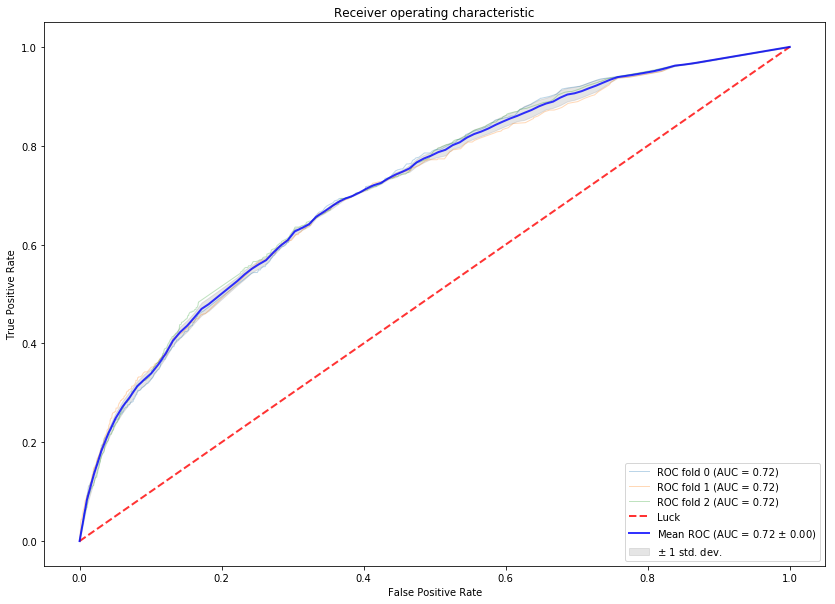

,AUC Train,AUC Test
0,0.915532,0.721606
1,0.909670,0.716792
2,0.903466,0.723853


In [106]:
cv = StratifiedKFold(n_splits=3 , random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(3)):
    m1.fit(X_train.iloc[train].values, y_train.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    score_f1 = weighted_avg(train)
    score_f1_test = weighted_avg(test)
    score_avg.append(score_f1_test)
    y_predict = m1.predict(X_train.iloc[test])
    scores_class = classification_report(y_train.iloc[test],y_predict)
    print(scores_class)
    print(confusion_matrix(y_train.iloc[test],y_predict))
print(score_avg)
print(sum(score_avg)/len(score_avg))
plot_roc_curve(fprs, tprs); 
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [104]:
y_test_preds = m1.predict(X_test)
data = {
    'Col1':y_test_cols,
    'Col2':y_test_preds
}
final_df = pd.DataFrame(data)
final_df.to_csv("D:/Kaggle/first.csv",index=False)

In [157]:
fi = rf_feat_importance(m, X_train); fi[:125]

,cols,imp
39,Col13,0.019801
22,Col874,0.018810
14,Col633,0.018747
3,Col240,0.018664
31,Col163,0.017036
55,Col164,0.016448
17,Col12,0.016269
5,Col10,0.016151
24,Col177,0.016002
98,Col175,0.015916


In [162]:
to_keep = fi[fi.imp>0.003].cols; len(to_keep)

113

now this competiton was very good but i did very basic mistakes , my cv strategy and poor feature selection and not using stacking properly made my model to overfit on the private leaderboard,
Rank 2 on Public LeaderBoard
Rank 42 on Private Leader Board